In [ ]:
Name : Omar Emad 

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'D:\level 4 cs\Smester 2\Project ML\Project Ml\database.csv')

# Drop irrelevant columns
df = df.drop(['Player', 'Team', 'Nation', 'Position', 'Age', 'Date'], axis=1)

# Convert Pass Completion % to float after replacing comma with dot
df['Pass Completion %'] = df['Pass Completion %'].str.replace(',', '.').astype(float)

# Drop rows with missing values
df = df.dropna()

# Separate features (X) and target (y)
X = df.drop('Goals', axis=1)
y = df['Goals']

# Normalize the feature data (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print the first 5 rows of the dataframe to verify
print("First 5 rows of the prepared dataset:")
print(df.head())

# Print the shape of the feature data to confirm the size
print("\nShape of the feature data (X):", X_scaled.shape)


First 5 rows of the prepared dataset:
    #  Minutes  Goals  Assists  Penalty Shoot on Goal  Penalty Shoot  \
0   8       90      0        0                      0              0   
1  10       90      0        0                      0              0   
2  16       60      0        0                      0              0   
3  17       30      0        1                      0              0   
4   7       60      0        0                      0              0   

   Total Shoot  Shoot on Target  Yellow Cards  Red Cards  ...  \
0            6                3             0          0  ...   
1            0                0             0          0  ...   
2            0                0             0          0  ...   
3            2                0             0          0  ...   
4            1                1             1          0  ...   

   Shot-Creating Actions  Goal-Creating Actions  Passes Completed  \
0                      2                      0                43   


In [63]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN model with 5 neighbors
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)


In [67]:
from sklearn.metrics import root_mean_squared_error, r2_score

# Calculate the Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)

# Calculate the R^2 Score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R^2 Score:", r2)


RMSE: 0.26081347480345657
R^2 Score: 0.35440625249222424


In [85]:
try:
    top_5_scorers = df_test.nlargest(5, 'Predicted Goals')
    print("\nTop 5 Predicted Scorers:")
    print(top_5_scorers[['Player', 'Predicted Goals']])
except Exception as e:
    print("Error in finding top 5 scorers:", e)


Top 5 Predicted Scorers:
               Player  Predicted Goals
1570      Cole Palmer              1.8
3461     Ismaila Sarr              1.6
3189   Erling Haaland              1.4
2997  Bruno Fernandes              1.4
818    Erling Haaland              1.4


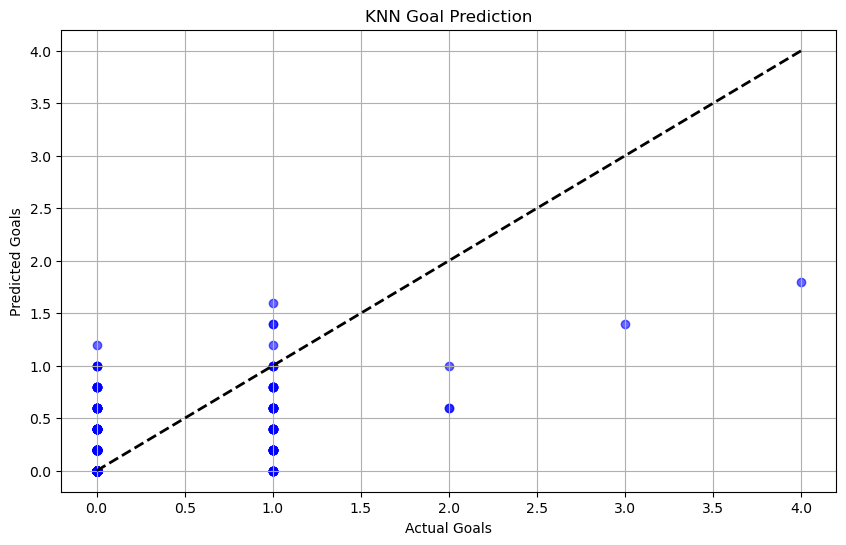

In [87]:
# Plot actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Goals')
plt.ylabel('Predicted Goals')
plt.title('KNN Goal Prediction')
plt.grid(True)
plt.show()

In [89]:
#***********************Description*******************************

In [93]:
# Step 1: Import Libraries

# Explanation:
# Imports necessary Python libraries:
# pandas: For handling and manipulating data in DataFrames.
# StandardScaler (from sklearn.preprocessing): To normalize/scale numerical features.
# train_test_split (from sklearn.model_selection): To split data into training and testing sets.
# KNeighborsRegressor (from sklearn.neighbors): To create and train a KNN regression model.
# root_mean_squared_error, r2_score (from sklearn.metrics): To evaluate model performance.
# matplotlib.pyplot: For plotting visualizations (e.g., scatter plots).

In [95]:
# Step 2: Load the Dataset

# Explanation:
# Loads the dataset (database.csv) from the specified file path into a pandas DataFrame (df).
# The r prefix ensures that backslashes in the file path are treated correctly on Windows.

In [97]:
# Step 3: Inspect the Original Dataset

# Explanation:
# Prints the column names of the DataFrame df to verify the structure of the dataset.

In [99]:
# Step 4: Save Player Names

# Explanation:
# Creates a copy of the Player column in a new DataFrame (df_original) to preserve player names.
# Prints the columns and the first 5 rows of df_original to verify that the Player column was correctly extracted.

In [101]:
# Step 5: Drop Irrelevant Columns

# Explanation:
# Removes columns (Player, Team, Nation, Position, Age, Date) from df that are not used as features for the model.
# axis=1 specifies that columns (not rows) are being dropped.

In [103]:
# Step 6: Clean and Convert Pass Completion %

# Explanation:
# Replaces commas with dots in the Pass Completion % column (e.g., converts "85,5" to "85.5").
# Converts the column to a float type for numerical processing.

In [105]:
# Step 7: Handle Missing Values

# Explanation:
# Removes any rows in df that contain missing values (NaN).

In [107]:
# Step 8: Separate Features and Target

# Explanation:
# Creates X, the feature matrix, by dropping the Goals column from df (all columns except Goals are features).
# Creates y, the target variable, which contains the Goals column.

In [109]:
# Step 9: Normalize Features

# Explanation:
# Initializes a StandardScaler to standardize features (scales them to have mean = 0 and standard deviation = 1).
# Applies fit_transform to X to compute the scaling parameters and transform the features into X_scaled.

In [111]:
# Step 10: Verify the Prepared Dataset

# Explanation:
# Prints the first 5 rows of df to verify the processed dataset.
# Prints the shape of X_scaled (number of rows and columns) to confirm the size of the feature matrix.

In [113]:
# Step 11: Split Data into Training and Testing Sets

# Explanation:
# Splits the data into training (80%) and testing (20%) sets using train_test_split.
# X_scaled: Features for training/testing.
# y: Target variable (goals) for training/testing.
# df.index: Original indices of the DataFrame, included to track row indices for later use.
# test_size=0.2: 20% of the data is reserved for testing.
# random_state=42: Ensures reproducibility of the split.

# Outputs:
# X_train, X_test: Training and testing feature sets.
# y_train, y_test: Training and testing target sets.
# train_indices, test_indices: Indices for training and testing rows.

In [115]:
# Step 12: Verify Split Data

# Explanation:
# Prints the shape of X_test (number of test samples and features).
# Prints the length of test_indices (number of test samples).
# Prints the first 5 indices in test_indices to inspect them.

In [117]:
# Step 13: Train the KNN Model

# Explanation:
# Initializes a KNN regression model with n_neighbors=5 (uses the 5 nearest neighbors to predict goals).
# Trains the model using fit on the training data (X_train, y_train).

In [119]:
# Step 14: Make Predictions

# Explanation:
# Uses the trained KNN model to predict goals for the test set (X_test), storing results in y_pred.
# Prints the length of y_pred to confirm the number of predictions.

In [121]:
# Step 15: Evaluate the Model

# Explanation:
# Calculates the Root Mean Squared Error (RMSE) between actual (y_test) and predicted (y_pred) goals.
# Calculates the R² Score to measure how well the model explains the variance in the target variable.
# Prints both metrics.

In [123]:
# Step 16: Identify Predicted Top Scorer

# Explanation:
# Creates df_test by selecting rows from df_original (containing player names) corresponding to test_indices.
# Adds a new column Predicted Goals to df_test with the predicted goals (y_pred).
# Prints the shape of df_test, its columns, and the first 5 rows to verify.
# Wrapped in a try-except block to catch and display any errors (e.g., mismatched indices or lengths).

In [125]:
# Step 17: Find the Top Scorer

# Explanation:
# Finds the player with the highest predicted goals using idxmax() to get the index of the maximum value in Predicted Goals.
# Prints the player’s name and their predicted goals (formatted to 2 decimal places).
# Wrapped in a try-except block to handle potential errors (e.g., if Predicted Goals is missing).

In [127]:
# Step 18: Show Top 5 Predicted Scorers

# Explanation:
# Selects the top 5 players with the highest predicted goals using nlargest(5, 'Predicted Goals').
# Prints a table with their names and predicted goals.
# Wrapped in a try-except block to catch errors (e.g., if Predicted Goals doesn’t exist).

In [129]:
# Step 19: Visualize Predictions

# Explanation:
# Creates a scatter plot comparing actual goals (y_test) to predicted goals (y_pred).
# Adds a diagonal dashed line (k--) representing perfect predictions (where actual = predicted).
# Sets labels, title, and grid for clarity.
# Displays the plot.

In [ ]:
# Summary
# The code is a complete machine learning pipeline that:

# 1-Loads and preprocesses a football player dataset.
# 2-Trains a KNN model to predict goals based on player statistics.
# 3-Evaluates the model using RMSE and R² metrics.
# 4-Identifies the top predicted scorer and the top 5 scorers by linking predictions to player names.
# 5-Visualizes actual vs. predicted goals.